In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# split
from sklearn.model_selection import train_test_split


# --Preprocessing-- #
# binning
from sklearn.preprocessing import KBinsDiscretizer

# Polynomial
from sklearn.preprocessing import PolynomialFeatures

# column transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,IterativeImputer, KNNImputer

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder
from category_encoders.binary import BinaryEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

#Imbalance
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

#--Cross Validation--#
from sklearn.model_selection import StratifiedKFold, KFold,cross_val_score, cross_validate

#--Modeling--#
# model regression
from sklearn.tree import plot_tree, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import statsmodels.api as sm

# model clasification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Model Ensemble
from sklearn.ensemble import VotingClassifier, StackingClassifier, VotingRegressor, StackingRegressor,RandomForestRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

#--Hyperparameter Tuning--#
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#--scoring--#
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, f1_score, accuracy_score, recall_score, precision_score, fbeta_score, make_scorer, precision_recall_curve,roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

## **Contents**

Business Problem Understanding

1. Load DataSet
2. Explanatory Data Analysis (EDA)
3. Define X and y
4. Data Splitting
5. Preprocessing
6. Cross Validation
7. Hyperparameter Tuning
8. Predict to Test Set
9. Feature Importance
10. Conclusion
11. Recommendation

## **Business Problem**

**Context:**

California's real estate market is one of the most dynamic and complex in the United States. Property values fluctuate widely due to numerous factors including geographic location, economic conditions, property characteristics, and proximity to amenities such as the ocean. These fluctuations create challenges for stakeholders trying to accurately assess property values and make timely investment or policy decisions.

In this landscape, Property Corp, a real estate development and investment firm, is seeking to leverage data science to enhance its pricing strategy, identify profitable locations, and reduce risks in housing development projects. To achieve this, they require a robust predictive model that can estimate the median house value across different locations in California based on a range of property and socio-economic attributes.

**Problem Statement:**

Currently, Property Corp and other real estate stakeholders lack a scalable, data-driven tool that can reliably predict housing prices based on critical property features and economic indicators. This limitation results in suboptimal pricing decisions, misallocated development budgets, and missed investment opportunities.

The core problem this project addresses is:
"How can we accurately estimate the median house value across California regions using available property and demographic data to support strategic decision-making in real estate development and investment?"

**Business Objective:**

This project aims to develop a machine learning-based regression model that:

- Predicts median house values based on structured input features including geographical location (longitude, latitude), property characteristics (e.g., number of rooms, bedrooms, house age), and socio-economic data (e.g., median income, proximity to ocean).
- Identifies key drivers of housing prices, quantifying the relative importance of each feature to support transparency and interpretability.
- Delivers actionable business insights to help Property Corp and other stakeholders:
    - Optimize property pricing strategies.
    - Pinpoint high-yield investment zones.
    - Forecast returns on development projects with greater confidence.

**Primary Stakeholders:**

As the project sponsor, Property Corp will utilize this model to:
- Evaluate the potential profitability of new and existing real estate projects.
- Set competitive pricing for residential developments in different California regions.
- Make informed decisions on resource allocation and urban planning investments.

**Additional Stakeholders:**

- Real Estate Investors – To discover undervalued properties and predict future returns.
- Property Developers – To guide construction efforts toward locations with the best predicted value growth.
- Urban Planners & Policy Makers – To analyze housing affordability trends and implement data-backed zoning or subsidy policies.

## **Data Understanding**

- DataSet berisikan data yang berkaitan dengan rumah-rumah di distrik California
- DataSet diambil berdasarkan data sensus tahun 1990

**Column Information**
| No | Column Name           | Data Type | Description                                                                                   |
|----|-----------------------|-----------|----------------------------------------------------------------------------------------------|
| 1  | longitude             | float64   | Longitude coordinate of the block group (geographical location, west-east position).          |
| 2  | latitude              | float64   | Latitude coordinate of the block group (geographical location, north-south position).         |
| 3  | housing_median_age    | float64   | Median age of houses in the block group.                                                     |
| 4  | total_rooms           | float64   | Total number of rooms in all houses within the block group.                                  |
| 5  | total_bedrooms        | float64   | Total number of bedrooms in all houses within the block group.                               |
| 6  | population            | float64   | Total population of the block group.                                                         |
| 7  | households            | float64   | Total number of households (a group of people living together) in the block group.           |
| 8  | median_income         | float64   | Median income of households in the block group (in tens of thousands of US Dollars).         |
| 9  | ocean_proximity       | object    | Proximity of the block group to the ocean (categorical: e.g., INLAND, NEAR BAY, <1H OCEAN).  |
| 10 | median_house_value    | float64   | Median house value for households within the block group (in US Dollars).

## **1. Load DataSet**

In [69]:
# Load DataSet 
# California Housing dataset
df = pd.read_csv("data_california_house.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


In [70]:
# display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [71]:
# Check for missing values
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [72]:
df[["ocean_proximity"]].value_counts()

ocean_proximity
<1H OCEAN          6369
INLAND             4576
NEAR OCEAN         1879
NEAR BAY           1622
ISLAND                2
Name: count, dtype: int64

In [73]:
df[df["total_bedrooms"].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
88,-121.47,38.61,31.0,1072.0,NaN,781.0,281.0,1.6563,INLAND,65800.0
119,-117.28,34.26,18.0,3895.0,NaN,1086.0,375.0,3.3672,INLAND,133600.0
251,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,INLAND,158700.0
340,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,146500.0
410,-122.42,40.44,16.0,994.0,NaN,495.0,181.0,2.1875,INLAND,76400.0
...,...,...,...,...,...,...,...,...,...,...
13856,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN,150400.0
13932,-117.87,33.83,27.0,2287.0,NaN,1140.0,351.0,5.6163,<1H OCEAN,231000.0
13989,-118.40,34.17,24.0,6347.0,NaN,2945.0,1492.0,3.3545,<1H OCEAN,221500.0
14308,-118.55,34.19,18.0,5862.0,NaN,3161.0,1280.0,3.1106,<1H OCEAN,170600.0


In [74]:
df.duplicated().sum()

np.int64(0)

In [75]:
# Count number of zeros in each column
zero_counts = (df == 0).sum()
print(zero_counts)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64


In [76]:
empty_string_counts = df.select_dtypes(include='object').apply(lambda col: (col == '').sum())
print(empty_string_counts)

ocean_proximity    0
dtype: int64


After checking all columns in the dataset, no entries with a value of 0 or empty string were found. This suggests that zeros are not used as placeholders for missing or undefined values and in this dataset.

In [77]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## **2. EDA (Explanatory Data Analysis)**

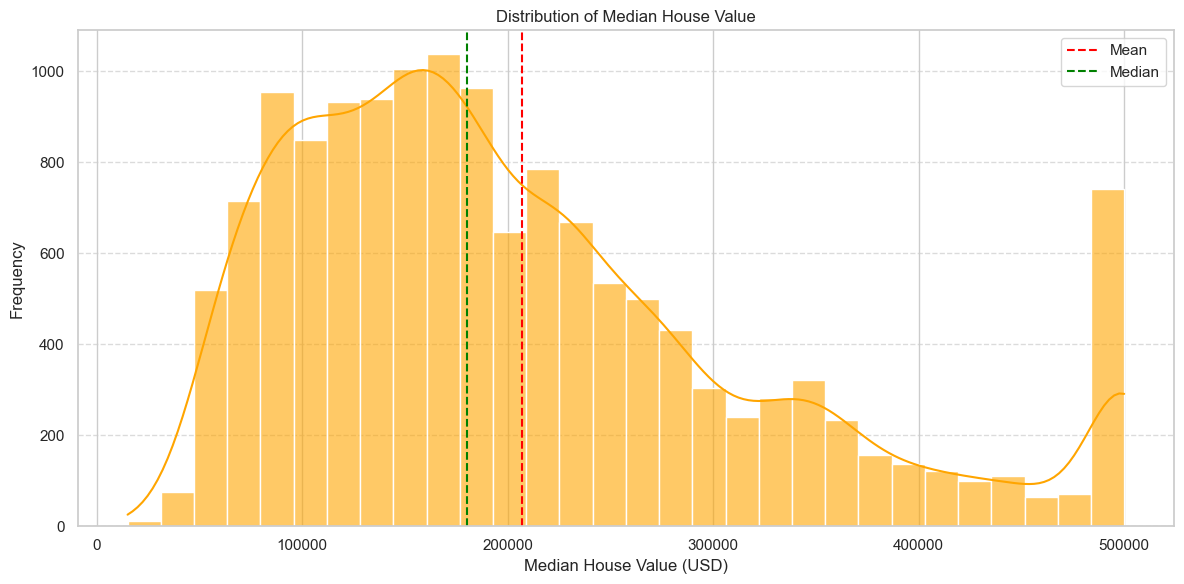

In [78]:
# Distribution of the target variable
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(df["median_house_value"], kde=True, color="orange", bins=30, alpha=0.6)
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value (USD)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axvline(df["median_house_value"].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df["median_house_value"].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.tight_layout()
plt.show()

**Insights:**

1. Distribution Shape:
- The distribution is right-skewed, indicating that most properties have a median house value concentrated in the lower to mid range, while smaller proportion of properties have significantly higher values.

2. Central Tendency (Mean vs Median):
- The median (green dashed line) is lower than the mean (red dashed line), further confirming the right skewed distribution. This suggest the presence of high value houses that pulling mean upwards.

3. Potential Outliers:
- There is a noticable spike at the far right near the $500.000. This common pattern in datasets where the target variable is capped or has a ceiling effect. This could indicate that some property values are capped at a maximum limit, potentially impacting model accuracy.

4. Concenteration of Data:
- The majority of houses are priced between $100.000 and $300.000, with a peak in the $150.000 - $200.000 range
- The sharp drop off after the $300.000 suggests that high value properties are relatively rare

5. Data Imbalance:
- The presence of a large number of lower value hosues compared to high value houses may suggest a potential data imbalance, which could impact model training.

Text(0.5, 1.0, 'Missing Values Heatmap Before Outlier Removal')

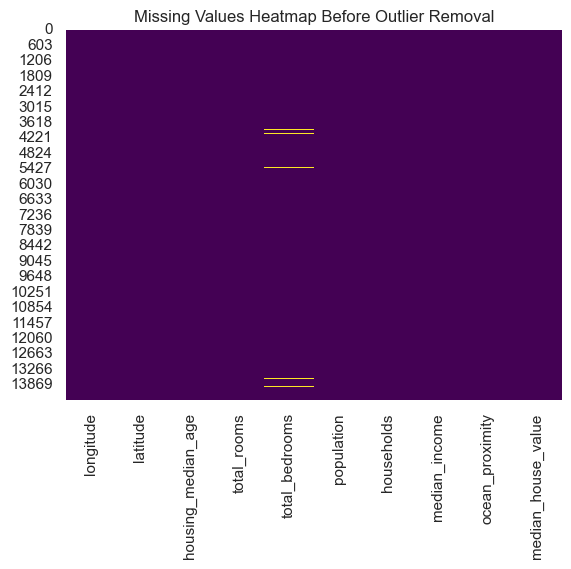

In [79]:
# Visualisation of missing Value Heatmap
sns.heatmap(df.isna(), cmap='viridis', cbar=False)
plt.title("Missing Values Heatmap Before Outlier Removal")

**Insights:**

The majority of missing values are concenterated in the "total_bedrooms" column with 137 NaN which is only 0.95% from 14.448 data.

In [80]:
# Checking the number of missing values in each ocean_proximity category
missing_counts = df[df['total_bedrooms'].isna()]['ocean_proximity'].value_counts()
print("Number of missing values in each ocean_proximity category:\n", missing_counts)

Number of missing values in each ocean_proximity category:
 ocean_proximity
<1H OCEAN     69
INLAND        32
NEAR OCEAN    24
NEAR BAY      12
Name: count, dtype: int64


In [81]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: count, dtype: int64

**Insight:**

1. <1H OCEAN: This category has the highest number of missing values with 69 missing entries. Since it is a significant number, it suggests that certain areas near the ocean might have incomplete data for the total_bedrooms attribute. This could indicate data collection issues or anomalies in specific coastal regions.

2. INLAND: There are 32 missing entries, which is the second highest. This could also suggest data collection inconsistencies or specific patterns in inland areas.

3. NEAR OCEAN: There are 24 missing entries, indicating that even areas closer to the ocean but not within 1 hour have some missing data, though less significant than <1H OCEAN.

4. NEAR BAY: This category has the least missing values with 12 missing entries, suggesting a relatively better data quality in bay areas.

**Key Insights:**
- The higher number of missing values in <1H OCEAN and INLAND categories may imply specific regional factors affecting data availability.

- The distribution of missing values is not random but shows some geographical patterns, potentially indicating targeted data collection issues or socio-economic factors.

- Further investigation into specific characteristics of <1H OCEAN and INLAND regions could provide more context on why total_bedrooms is missing.

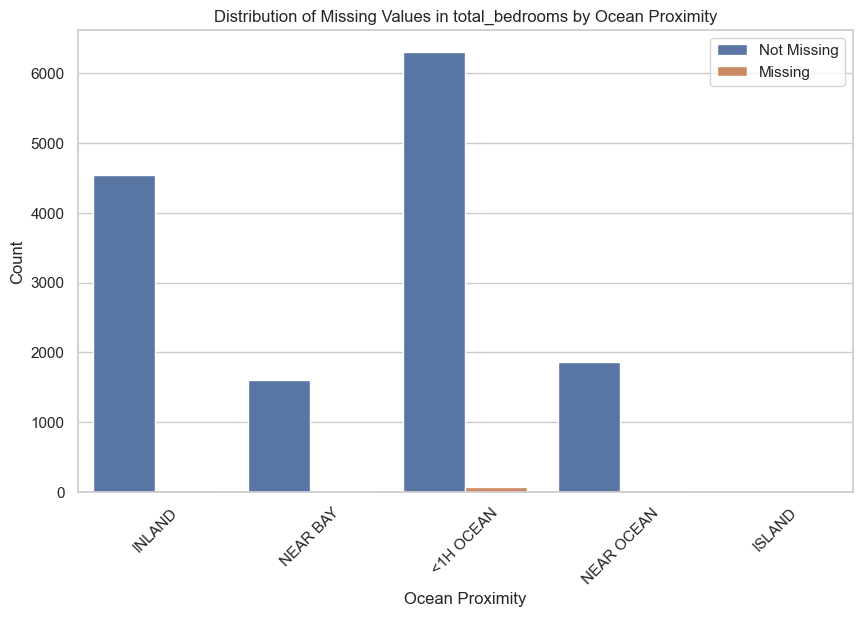

In [82]:
# Checking the distribution of missing values in total_bedrooms with respect to ocean_proximity
plt.figure(figsize=(10, 6))
sns.countplot(x='ocean_proximity', hue=df['total_bedrooms'].isna(), data=df)
plt.title('Distribution of Missing Values in total_bedrooms by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.legend(['Not Missing', 'Missing'])
plt.xticks(rotation=45)
plt.show()

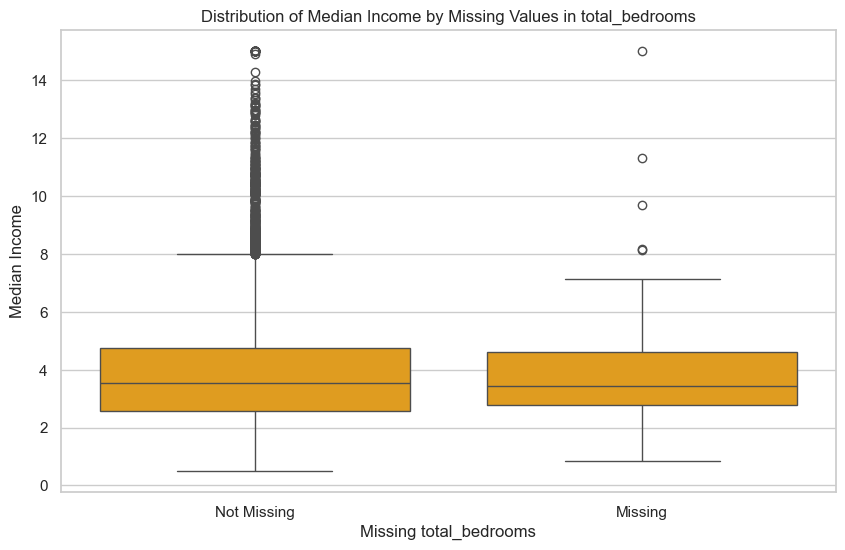

In [83]:
# Analyzing the relationship with median_income
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['total_bedrooms'].isna(), y='median_income',color = "orange", data=df)
plt.title('Distribution of Median Income by Missing Values in total_bedrooms')
plt.xlabel('Missing total_bedrooms')
plt.ylabel('Median Income')
plt.xticks([0, 1], ['Not Missing', 'Missing'])
plt.show()

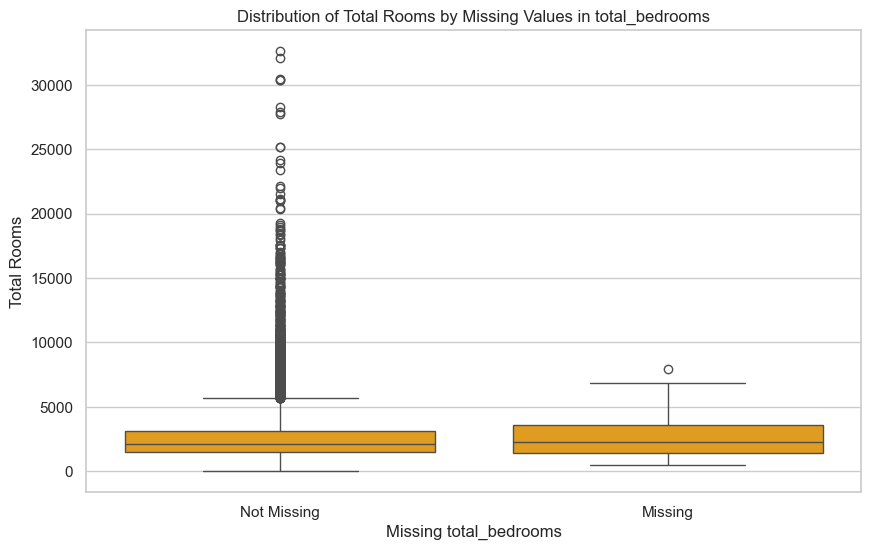

In [84]:
# Analyzing the relationship with total_rooms
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['total_bedrooms'].isna(), y='total_rooms', color= "orange", data=df)
plt.title('Distribution of Total Rooms by Missing Values in total_bedrooms')
plt.xlabel('Missing total_bedrooms')
plt.ylabel('Total Rooms')
plt.xticks([0, 1], ['Not Missing', 'Missing'])
plt.show()

**Insight:**

Based on the three charts above:

1. Ocean Proximity Analysis:
- The missing values in total_bedrooms are more concentrated in the <1H OCEAN and INLAND categories.
- This suggests that the missing data is not completely random, but could be related to certain geographical areas.

2. Median Income Analysis:
- The distribution of median_income is slightly lower for the missing values compared to the non-missing values.
- This could indicate that regions with missing total_bedrooms data are associated with slightly lower income levels, which could imply data collection issues in lower-income areas.

3. Total Rooms Analysis:
- The distribution of total_rooms for missing total_bedrooms data is also slightly lower than for the non-missing values.
- This pattern aligns with the income analysis, suggesting that areas with fewer rooms and lower incomes may have missing bedroom data. 

In [85]:
# Check outliers using IQR method
columns_to_check = ['total_bedrooms', 'total_rooms', 'median_income', 'housing_median_age', 'population', 'households']

def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifying outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Number of outliers in {column}: {len(outliers)}")
    print(f"IQR: {IQR}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")

In [86]:
detect_outliers('total_bedrooms')

Number of outliers in total_bedrooms: 879
IQR: 352.0
Lower Bound: -233.0
Upper Bound: 1175.0


In [87]:
df["total_bedrooms"].describe()

count    14311.000000
mean       538.260709
std        423.577544
min          1.000000
25%        295.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

**Insight of "total_bedrooms" column:**

1. Distribution Analysis:
- The mean (538.27) is higher than the median (435), indicating a right-skewed distribution. This is further supported by the presence of a maximum value (6445) that is significantly higher than the 75% (647) of the total bedrooms, suggesting potential outliers.

2. Outlier Analysis:
- The IQR method identified 879 outliers, which are values greater than the upper bound (1175). Since the maximum value (6445) is well above this bound, we can confirm that there are substantial outliers in this feature.

In [88]:
detect_outliers('total_rooms')

Number of outliers in total_rooms: 900
IQR: 1697.0
Lower Bound: -1094.5
Upper Bound: 5693.5


In [89]:
df["total_rooms"].describe()

count    14448.000000
mean      2640.132683
std       2191.612441
min          2.000000
25%       1451.000000
50%       2125.000000
75%       3148.000000
max      32627.000000
Name: total_rooms, dtype: float64

**Insight of "total_rooms" column:**

1. Distribution Analysis:
- The mean (2635.76) is significantly higher than the median (2125), indicating a right-skewed distribution.
- This skewness is further supported by the presence of a maximum value (32627), which is much greater than the 75% (3148), suggesting the presence of extreme values or outliers.

2. Outlier Analysis:
- Using the IQR method , 900 outliers were identified in the "total_rooms" column.
- The IQR was calculated as 1697, with an upper bound of 5693.5 and a lower bound of -1094.5.
- Further filtering showed that there are no values below the lower bound , but the maximum value (32627) is far above the upper bound, confirming the presence of significant high-end outliers.

In [90]:
detect_outliers('median_income')

Number of outliers in median_income: 482
IQR: 2.1655000000000006
Lower Bound: -0.6776500000000012
Upper Bound: 7.984350000000001


In [91]:
df["median_income"].describe()  

count    14448.000000
mean         3.866667
std          1.891158
min          0.499900
25%          2.570600
50%          3.539100
75%          4.736100
max         15.000100
Name: median_income, dtype: float64

**Insight of "median_income" column:**

1. Distribution Analysis:
- The mean (3.87) is slightly higher than the median (3.54), indicating a  right-skewed distribution.
- This skewness is further supported by the presence of a maximum value (15) that is significantly greater than the 75% (4.74) , suggesting the presence of potential high-end outliers .

2. Outlier Analysis:
- Using the IQR method , 482 outliers were identified in the "median_income" column.
- The IQR was calculated as 2.17, with an upper bound of approximately 7.98 and a lower bound of approximately -0.68.
- Further filtering showed that there are no values below the lower bound , but the maximum value (15) is far above the upper bound, confirming the presence of significant high-end outliers.

In [92]:
detect_outliers('housing_median_age')

Number of outliers in housing_median_age: 0
IQR: 19.0
Lower Bound: -10.5
Upper Bound: 65.5


In [93]:
detect_outliers("population")

Number of outliers in population: 827
IQR: 940.0
Lower Bound: -626.0
Upper Bound: 3134.0


In [94]:
df["population"].describe()

count    14448.000000
mean      1425.157323
std       1149.580157
min          3.000000
25%        784.000000
50%       1165.000000
75%       1724.000000
max      35682.000000
Name: population, dtype: float64

**Insight of population column:**

1. Distribution Analysis :
- The mean (1425.16) is significantly higher than the median (1165) , indicating a right-skewed distribution.
- This skewness is further supported by the presence of a maximum value (35682) that is much greater than the 75% (1724) , suggesting the presence of extreme values or outliers.

2. Outlier Analysis :
- Using the IQR method , 827 outliers were identified in the "population" column.
- The IQR was calculated as 940 , with an upper bound of 3134 and a lower bound of -626.
- Further filtering showed that there are no negative values since population cannot be negative, but the maximum value (35682) is far above the upper bound, confirming the presence of significant high-end outliers.

In [95]:
detect_outliers("households")

Number of outliers in households: 842
IQR: 325.0
Lower Bound: -208.5
Upper Bound: 1091.5


In [96]:
df["households"].describe()

count    14448.000000
mean       499.508929
std        383.098390
min          1.000000
25%        279.000000
50%        410.000000
75%        604.000000
max       6082.000000
Name: households, dtype: float64

**Insight of "households" column:**

1. Distribution Analysis :
- The mean (499.51) is slightly higher than the median (410) , indicating a right-skewed distribution.
- This skewness is further supported by the presence of a maximum value (6082) that is significantly greater than the 75% (604) , suggesting the presence of potential outliers.

2. Outlier Analysis :
- Using the IQR method , 325 outliers were identified in the "households" column.
- The IQR was calculated as 325 , with an upper bound of 1091.5 and a lower bound of -208.5.
- Further filtering showed that there are no negative values since the number of households cannot be negative, but the maximum value (6082) is far above the upper bound, confirming the presence of significant high-end outliers.

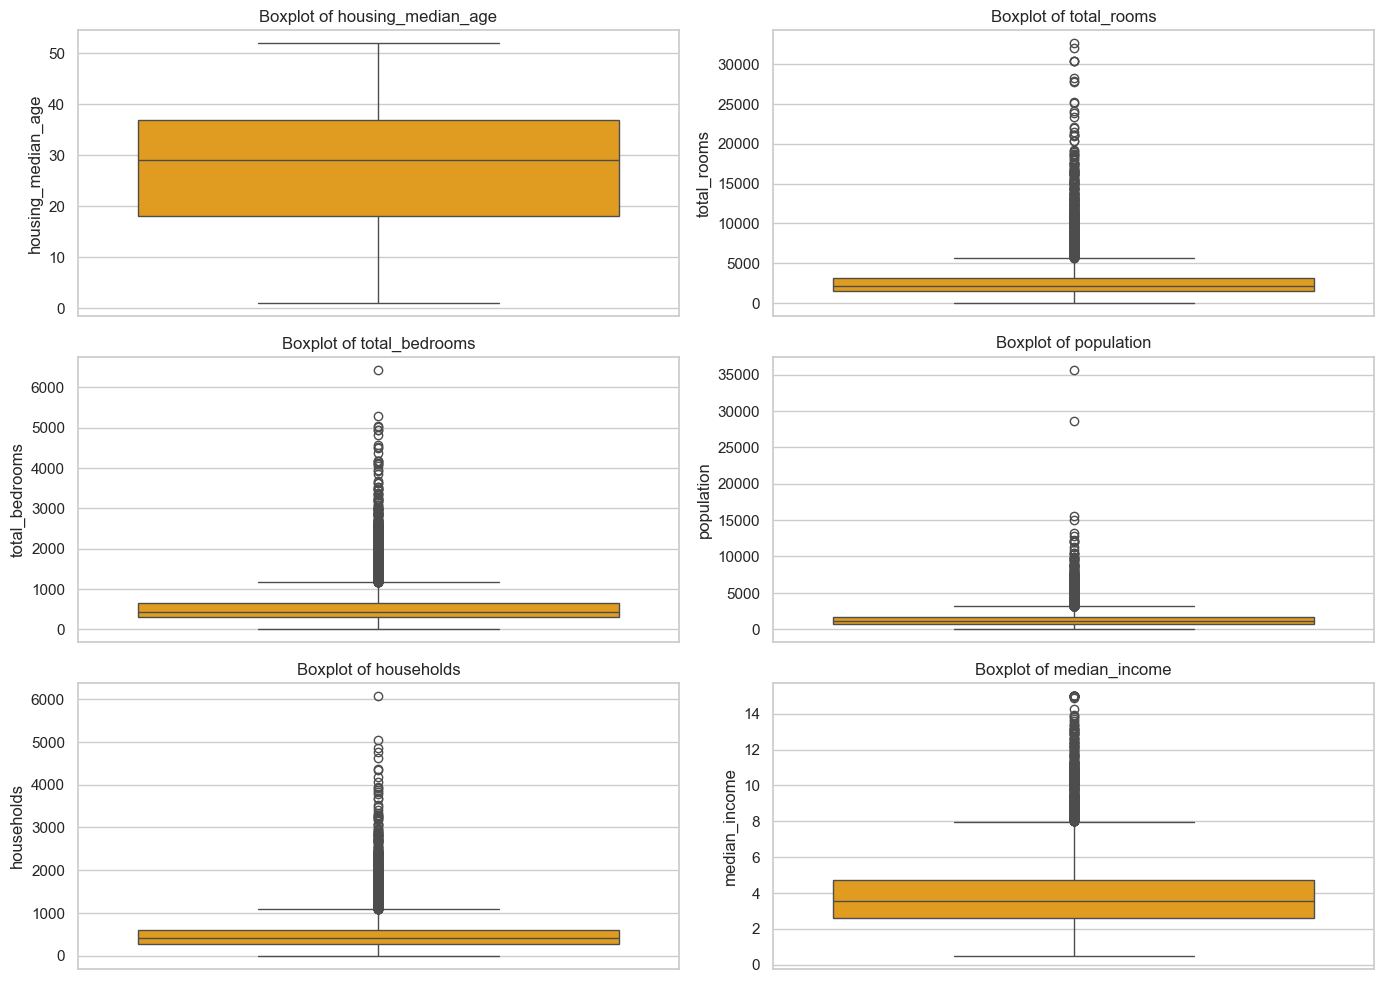

In [97]:
# Boxplot for numerical features
numeric_features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(df[col], color='orange')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [98]:
# Check extreme outliers in population column
df[df["population"]>15000].shape[0]

4

In [99]:
# Check extreme outliers in total_bedrooms column
df[df["total_bedrooms"]>5000].shape[0] 

4

In [100]:
# Check extreme outliers in households column
df[df["households"]>5000].shape[0]

2

In [101]:
# Check how many NaNs exist in total_bedrooms before filtering
print("Before filtering:", df['total_bedrooms'].isna().sum())
df = df[
    (df["population"] <= 15000) &
    (df["total_bedrooms"] <= 5000) &
    (df["households"] <= 5000)
]
print("After filtering:", df['total_bedrooms'].isna().sum())

Before filtering: 137
After filtering: 0


In [102]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

Text(0.5, 1.0, 'Missing Values Heatmap After Outlier Removal')

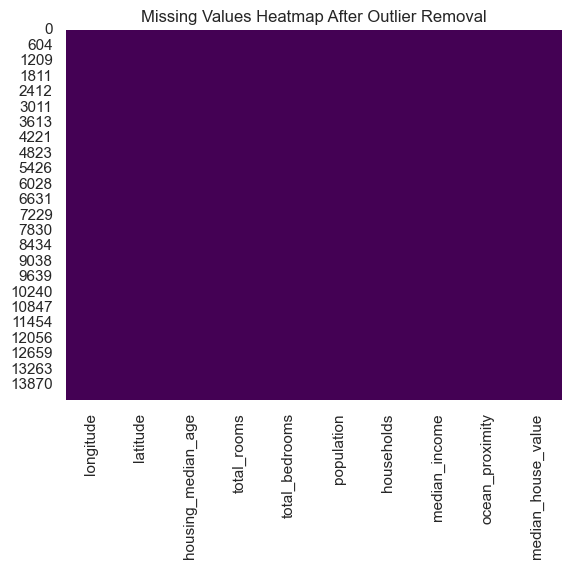

In [103]:
# Visualisation of missing Value Heatmap
sns.heatmap(df.isna(), cmap='viridis', cbar=False)
plt.title("Missing Values Heatmap After Outlier Removal")

The dataset contains 137 missing (NaN) values in the "total_bedrooms" column. Upon analysis, it was observed that these missing values only appear in rows that also contain extreme or unrealistic values in other columns such as "population" and "households".

As part of the data cleaning process, rows with extreme outliers were removed using the following thresholds:

- "population" > 15000
- "total_bedrooms" > 5000
- "households" > 5000

When this filtering is applied, all rows containing NaN values in "total_bedrooms" are naturally excluded. This suggests that the missing data does not belong to typical housing blocks but rather to edge cases or potentially erroneous records.

Therefore, removing the extreme outliers effectively removes the missing values without requiring separate imputation , while preserving the integrity of the core dataset used for modeling.

This approach simplifies the pipeline and ensures that the final dataset reflects realistic housing market conditions, improving the reliability and performance of the predictive model.

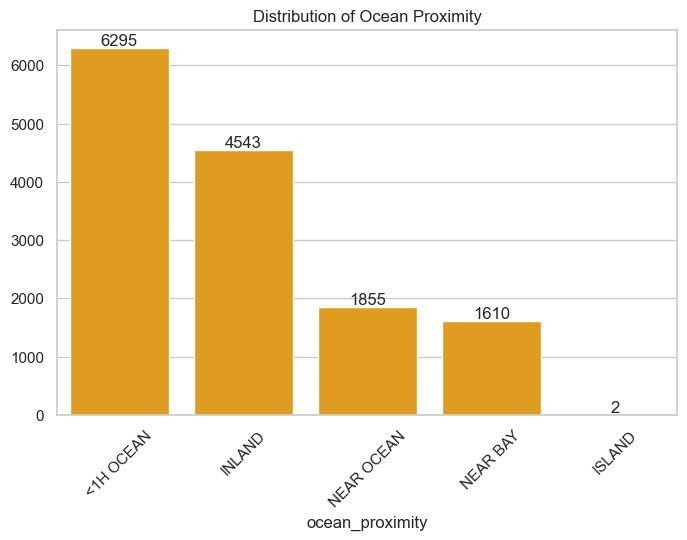

In [104]:
# Countplot for categorical feature
plt.figure(figsize=(8, 5))
ocean_proximity_counts = df['ocean_proximity'].value_counts(ascending=False)
ax = sns.barplot(x=ocean_proximity_counts.index, y=ocean_proximity_counts.values, color = 'orange')
plt.title('Distribution of Ocean Proximity')
plt.xticks(rotation=45)

# Adding values above bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')


In [105]:
df.groupby("ocean_proximity")["median_house_value"].count().sort_values(ascending=False)

ocean_proximity
<1H OCEAN     6295
INLAND        4543
NEAR OCEAN    1855
NEAR BAY      1610
ISLAND           2
Name: median_house_value, dtype: int64

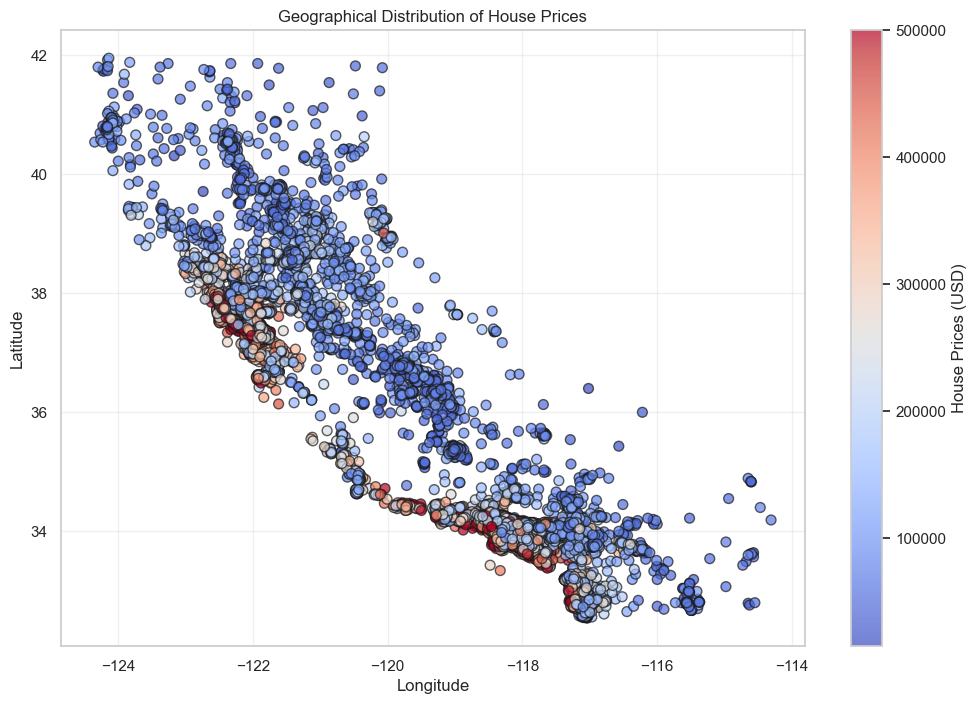

In [106]:
# Scatterplot for geographical location (longitude vs latitude)
plt.figure(figsize=(12, 8))
sc = plt.scatter(
    df['longitude'], df['latitude'], 
    c=df['median_house_value'], cmap='coolwarm', alpha=0.7, s=50, edgecolor='k'
)
plt.colorbar(label='House Prices (USD)')
plt.title('Geographical Distribution of House Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(alpha=0.3)
plt.show()

**Insight:**

From the scatterplot, we can extract the following insights:

1. Geographical Distribution of Prices:
- The higher house prices (redder markers) are concentrated along the coast, particularly near Los Angeles, San Francisco, and other major cities.
- Inland areas tend to have lower house prices, as indicated by the cooler blue tones.

2. Coastal Effect:
- The coastal regions, especially around -122 longitude and 34-38 latitude, show a cluster of high-value houses. This aligns with areas like the Bay Area and Los Angeles, where real estate is typically more expensive.

3. Population Density Correlation:
- The denser clusters of points indicate more populated urban areas, which often have higher property values.

4. Outliers and Anomalies:
- Some individual points that are far away from main clusters might indicate areas with particularly high or low house values compared to their surroundings.
- These could be outliers or areas of specific interest for further analysis.


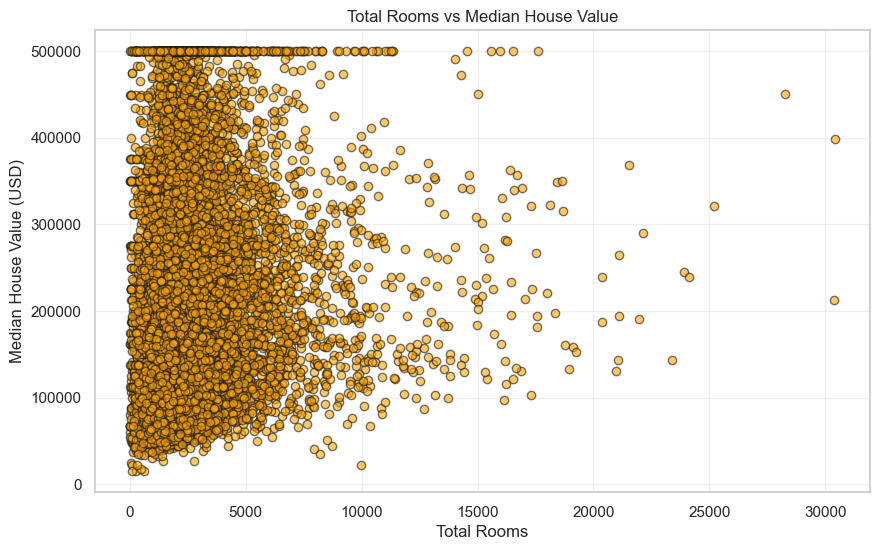

In [107]:
# Scatterplot for Total Rooms vs Median House Value
plt.figure(figsize=(10, 6))
plt.scatter(df['total_rooms'], df['median_house_value'], alpha=0.6, color='orange', edgecolor='k')
plt.title('Total Rooms vs Median House Value')
plt.xlabel('Total Rooms')
plt.ylabel('Median House Value (USD)')
plt.grid(alpha=0.3)
plt.show()

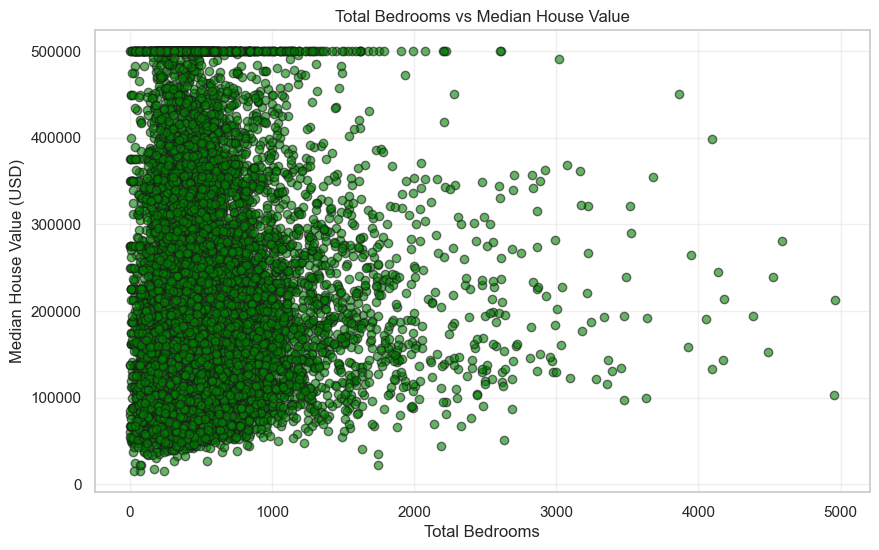

In [108]:
# Scatterplot for Total Bedrooms vs Median House Value
plt.figure(figsize=(10, 6))
plt.scatter(df['total_bedrooms'], df['median_house_value'], alpha=0.6, color = "green", edgecolor='k')
plt.title('Total Bedrooms vs Median House Value')
plt.xlabel('Total Bedrooms')
plt.ylabel('Median House Value (USD)')
plt.grid(alpha=0.3)
plt.show()

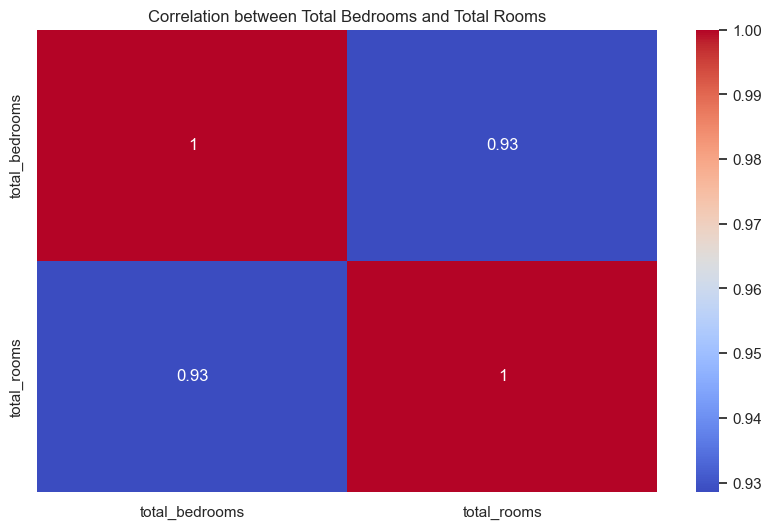

In [109]:
# Correlation Analysis between Total Bedrooms and Total Rooms
plt.figure(figsize=(10, 6))
sns.heatmap(df[['total_bedrooms', 'total_rooms']].corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation between Total Bedrooms and Total Rooms')
plt.show()

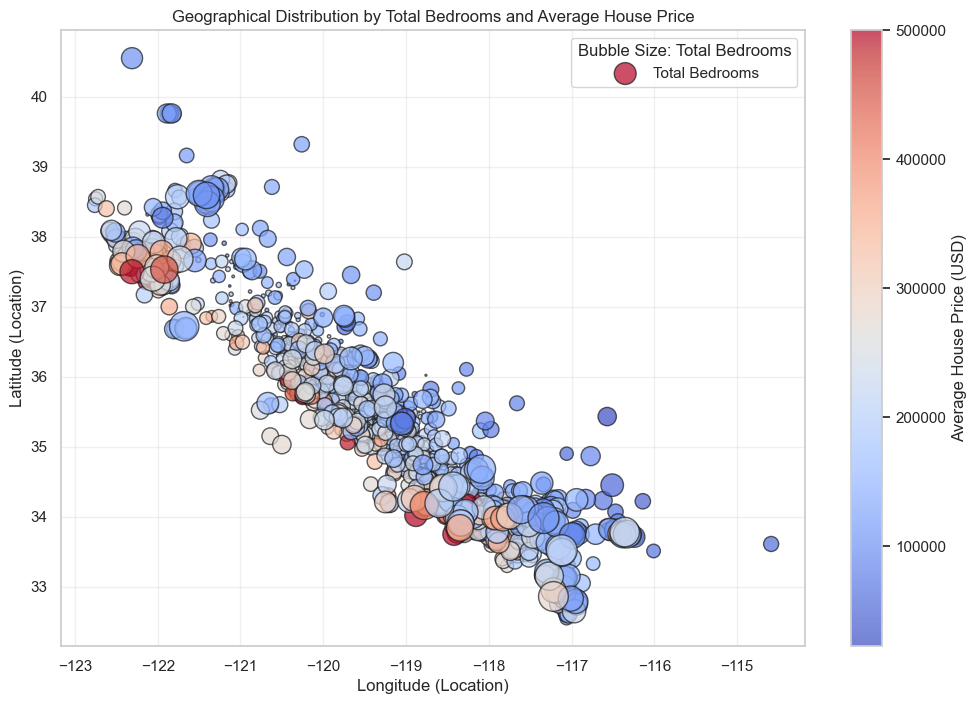

In [110]:
# Grouping by Total Bedrooms and Calculating Average House Value
bedroom_grouped = df.groupby('total_bedrooms').agg({'median_house_value': 'mean', 'latitude': 'mean', 'longitude': 'mean'}).reset_index()

# Scatterplot to Visualize the Relationship between Total Bedrooms and Location
plt.figure(figsize=(12, 8))
sc = plt.scatter(
    bedroom_grouped['longitude'], bedroom_grouped['latitude'], 
    c=bedroom_grouped['median_house_value'], cmap='coolwarm', alpha=0.7, s=bedroom_grouped['total_bedrooms'] / 10, edgecolor='k', label='Total Bedrooms'
)
plt.colorbar(label='Average House Price (USD)')
plt.title('Geographical Distribution by Total Bedrooms and Average House Price')
plt.xlabel('Longitude (Location)')
plt.ylabel('Latitude (Location)')
plt.grid(alpha=0.3)
plt.legend(title='Bubble Size: Total Bedrooms', loc='upper right')
plt.show()

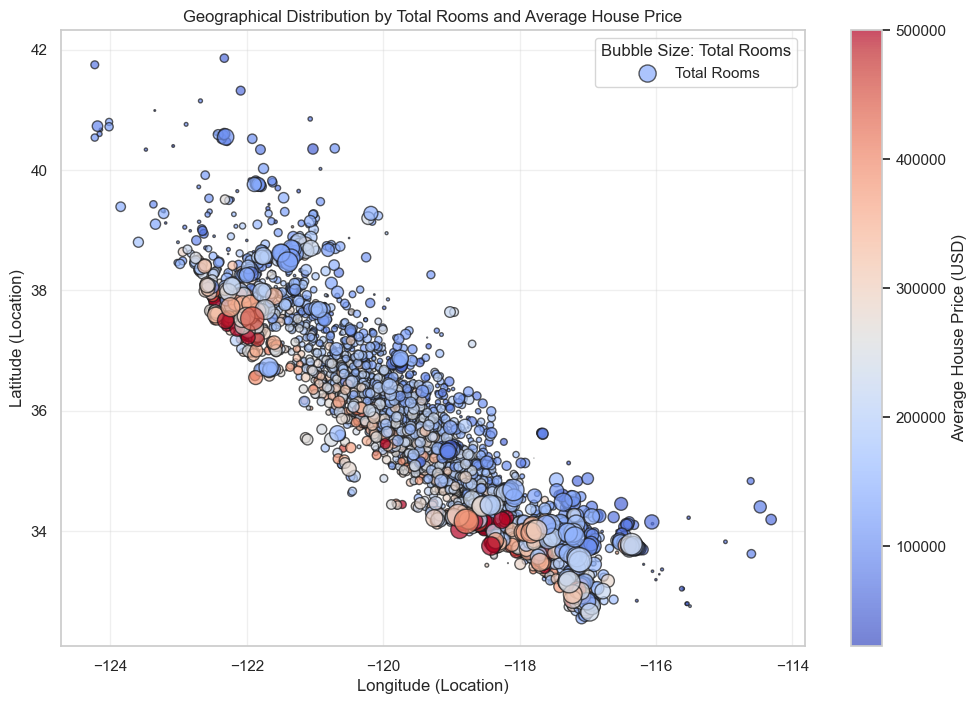

In [111]:
# Grouping by Total Rooms and Calculating Average House Value
room_grouped = df.groupby('total_rooms').agg({'median_house_value': 'mean', 'latitude': 'mean', 'longitude': 'mean'}).reset_index()

# Scatterplot to Visualize the Relationship between Total Rooms and Location
plt.figure(figsize=(12, 8))
sc = plt.scatter(
    room_grouped['longitude'], room_grouped['latitude'], 
    c=room_grouped['median_house_value'], cmap='coolwarm', alpha=0.7, s=room_grouped['total_rooms'] / 100, edgecolor='k', label='Total Rooms'
)
plt.colorbar(label='Average House Price (USD)')
plt.title('Geographical Distribution by Total Rooms and Average House Price')
plt.xlabel('Longitude (Location)')
plt.ylabel('Latitude (Location)')
plt.grid(alpha=0.3)
plt.legend(title='Bubble Size: Total Rooms', loc='upper right')
plt.show()

**Insight:**

Insights from the Scatterplot:

1. Size and Density of Data Points:
- Larger circles represent higher numbers of total rooms.
- The largest circles are concentrated in densely populated areas such as Los Angeles and San Francisco, indicating the presence of apartment complexes or large housing units.

2. Color Distribution (House Prices):
- Redder areas represent higher average house prices. These are predominantly concentrated along the coastal regions, especially around Los Angeles, San Francisco, and Silicon Valley.
- Inland areas, particularly in the Central Valley and other less populated regions, exhibit cooler colors (blues), indicating lower average house prices.

3. Spatial Distribution:
- The clustering of high-priced houses in coastal regions suggests a significant influence of location on housing prices, aligning with real-world trends where coastal areas are more desirable and expensive.
- Inland areas, despite having houses with many rooms (large circles), generally show lower average house prices, possibly due to less demand or lower land value.

## **3. Define X and y**

In [112]:
X = df.drop(columns=["median_house_value"])
y = df["median_house_value"]

## **4. Data Splitting**

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **5. Preprocessing**

In [114]:
# Categorical column
categorical_col = ['ocean_proximity']

# Build transformer
transformer = ColumnTransformer([
    ('OneHot', OneHotEncoder(drop='first'), categorical_col)  
], remainder='passthrough')

In [115]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHot', OneHotEncoder(drop='first'),
                                 ['ocean_proximity'])])

## **6. Cross Validation**

In [116]:
# Define base models
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Wrap models with log transformation on target
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# List of models for benchmarking
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]
model_names = ['LinearRegression', 'KNN', 'DecisionTree', 'RandomForest', 'XGBoost']

# Lists to store metric results
rmse_scores, rmse_means, rmse_stds = [], [], []
mae_scores, mae_means, mae_stds = [], [], []
mape_scores, mape_means, mape_stds = [], [], []

# Define cross-validator
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# Scoring functions
scoring_mae = 'neg_mean_absolute_error'
scoring_rmse = 'neg_root_mean_squared_error'
scoring_mape = 'neg_mean_absolute_percentage_error'

# Benchmark loop
for model, name in zip(models, model_names):
    
    # Build pipeline
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', model)
    ])
    
    # Cross-validation scores
    cv_mae = cross_val_score(estimator, X_train, y_train, cv=cv, scoring=scoring_mae)
    cv_rmse = cross_val_score(estimator, X_train, y_train, cv=cv, scoring=scoring_rmse)
    cv_mape = cross_val_score(estimator, X_train, y_train, cv=cv, scoring=scoring_mape)
    
    # Store RMSE
    rmse_scores.append(cv_rmse)
    rmse_means.append(-cv_rmse.mean())
    rmse_stds.append(cv_rmse.std())

    # Store MAE
    mae_scores.append(cv_mae)
    mae_means.append(-cv_mae.mean())
    mae_stds.append(cv_mae.std())

    # Store MAPE
    mape_scores.append(cv_mape)
    mape_means.append(-cv_mape.mean() * 100)  # Convert to percentage
    mape_stds.append(cv_mape.std() * 100)

# Combine into results DataFrame
results = pd.DataFrame({
    'Model': model_names,
    'Mean_RMSE': rmse_means,
    'Std_RMSE': rmse_stds,
    'Mean_MAE': mae_means,
    'Std_MAE': mae_stds,
    'Mean_MAPE (%)': mape_means,
    'Std_MAPE (%)': mape_stds
})

print("Benchmark Results:")
print(results.sort_values(by='Mean_RMSE'))

Benchmark Results:
              Model      Mean_RMSE     Std_RMSE      Mean_MAE      Std_MAE  \
4           XGBoost   50032.997801   927.326364  32543.459121   437.306100   
3      RandomForest   51342.364831  1115.153914  32995.469611   535.952663   
2      DecisionTree   71774.284726  1278.559546  46559.392233  1000.717392   
0  LinearRegression   86560.460859  4783.215808  51356.637498  1168.135300   
1               KNN  102120.006420   935.752935  77851.507082   493.213106   

   Mean_MAPE (%)  Std_MAPE (%)  
4      17.050178      0.412898  
3      17.321456      0.310882  
2      25.304369      0.325298  
0      25.891935      0.190300  
1      46.902468      0.822661  


**Insight:**

- All the metrics shown lower values indicate better performance
- Based on all metric, XGBoost consistently outperforms other models. This indicate that XGBoost is the best performing model for predicting house prices in this DataSet.
- KNN performs significantly worse than other models. KNN might not be suitebale for this regression task, possibbly due to its sensitivity to feature scaling or the nature of the data. 

## **7. Hyperparameter Tuning**

In [117]:
# Wrap XGBoost with log-transformed target
xgb_model = TransformedTargetRegressor(
    regressor=XGBRegressor(random_state=1),
    func=np.log,
    inverse_func=np.exp
)

# Create a pipeline instance
pipeline = Pipeline([
    ('preprocessor', transformer),
    ('model', xgb_model)
])

# Define hyperparameter space
param_dist = {
    # Tree depth
    'model__regressor__max_depth': list(range(3, 13)),
    
    # Learning rate
    'model__regressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
    
    # Number of trees
    'model__regressor__n_estimators': list(range(100, 301, 20)),
    
    # Subsample ratio
    'model__regressor__subsample': [0.6, 0.8, 1.0],
    
    # Fraction of features to use
    'model__regressor__colsample_bytree': [0.6, 0.8, 1.0],
    
    # Gamma: minimum loss reduction to make a split
    'model__regressor__gamma': [0, 0.1, 0.5, 1, 2],
    
    # L1 regularization
    'model__regressor__reg_alpha': [0, 0.001, 0.01, 0.1, 1],
    
    # L2 regularization
    'model__regressor__reg_lambda': [0, 0.001, 0.01, 0.1, 1]
}

# Set up RandomizedSearchCV
random_xgb = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=50,                  # Try 50 combinations
    scoring='neg_root_mean_squared_error',
    cv=5,                       # 5-fold cross-validation
    n_jobs=-1,                  # Use all CPU cores
    random_state=1
)

# Run hyperparameter search
random_xgb.fit(X_train, y_train)

# Get best model
best_model = random_xgb.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print("Best Parameters:", random_xgb.best_params_)
print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test MAPE (%): {mape:.2f}%")

Best Parameters: {'model__regressor__subsample': 1.0, 'model__regressor__reg_lambda': 0.001, 'model__regressor__reg_alpha': 1, 'model__regressor__n_estimators': 300, 'model__regressor__max_depth': 8, 'model__regressor__learning_rate': 0.1, 'model__regressor__gamma': 0, 'model__regressor__colsample_bytree': 0.6}
Test RMSE: 48808.47
Test MAE: 31281.47
Test MAPE (%): 16.70%


**Insight:**

**Performance Metrics on Test Set:**

1. Root Mean Squared Error (RMSE)
- Value : 48,808.47
- Interpretation :
    - RMSE measures the average magnitude of prediction errors.
    - A lower RMSE is better. Here, the RMSE is relatively high, indicating that the model's predictions have some error. However, whether this is acceptable depends on the scale of your target variable (median_house_value). If house prices are in the hundreds of thousands, this RMSE might be reasonable.

2. Mean Absolute Error (MAE)
- Value : 31,281.47
- Interpretation :
    - MAE measures the average absolute difference between predicted and actual values.
    - Similar to RMSE, a lower MAE is better. The MAE here is also relatively high but consistent with the RMSE, suggesting similar levels of error.

3. Mean Absolute Percentage Error (MAPE)
- Value : 16.70%
- Interpretation :
    - MAPE measures the average percentage error relative to the actual values.
    - A lower MAPE is better. Here, 16.70% means that, on average, the model's predictions are off by about 16.70% of the true house prices. This is a moderate error rate, depending on the context.

In [118]:
random_xgb.fit(X_train, y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OneHot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['ocean_proximity'])])),
                                             ('model',
                                              TransformedTargetRegressor(func=<ufunc 'log'>,
                                                                         inverse_func=<ufunc 'exp'>,
                                                                         regressor=XGBRegressor(base_score=None,
                                                                                                booster=None,
                                                                                                callbacks=None,
                                                                                                colsample_bylevel=N...
                                        'model__regressor__learning_rate': [0.01,
                                                                            0.05,
                                                                            0.1,
                                                                            0.2],
                                        'model__regressor__max_depth': [3, 4, 5,
                                                                        6, 7, 8,
                                                                        9, 10,
                                                                        11,
                                                                        12],
                                        'model__regressor__n_estimators': [100,
                                                                           120,
                                                                           140,
                                                                           160,
                                                                           180,
                                                                           200,
                                                                           220,
                                                                           240,
                                                                           260,
                                                                           280,
                                                                           300],
                                        'model__regressor__reg_alpha': [0,
                                                                        0.001,
                                                                        0.01,
                                                                        0.1,
                                                                        1],
                                        'model__regressor__reg_lambda': [0,
                                                                         0.001,
                                                                         0.01,
                                                                         0.1,
                                                                         1],
                                        'model__regressor__subsample': [0.6,
                                                                        0.8,
                                                                        1.0]},
                   random_state=1, scoring='neg_root_mean_squared_error')

## **8. Predict to Test Set**

Before Tuning

In [119]:
models = {
    'XGB': Pipeline([
        ('preprocessing', transformer),
        ('scaler', StandardScaler()),
        ('model', XGBRegressor(random_state=1))
    ])
}

score_rmse = []
score_mae = []
score_mape = []

# Predict
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,50235.580084,33364.991077,0.193346


After Tuning

In [120]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define best model
xgb_tuning = random_xgb.best_estimator_

# Fitting 
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Save the value of metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,48808.471292,31281.472353,0.167034


**Insight:**

1. Performance Improvement
- RMSE :
    - Before tuning: 50,235.58 and After tuning: 48,808.47
    - Improvement : RMSE decreased by approximately 2,427.11 , which is a 4.83% reduction .

- MAE :
    - Before tuning: 33,364.99 and After tuning: 31,281.47
    - Improvement : MAE decreased by approximately 2,083.52 , which is a 6.25% reduction .

- MAPE :
    - Before tuning: 19.33% and After tuning: 16.70%
    - Improvement : MAPE decreased by approximately 2.63 percentage points , which is a 13.56% reduction .

2. Impact of Hyperparameter Tuning
- The hyperparameter tuning process significantly improved the performance of the XGBoost model across all three metrics:
    - RMSE, MAE, and MAPE all showed notable reductions.
    - This indicates that the tuned hyperparameters helped the model better capture patterns in the data, leading to more accurate predictions.

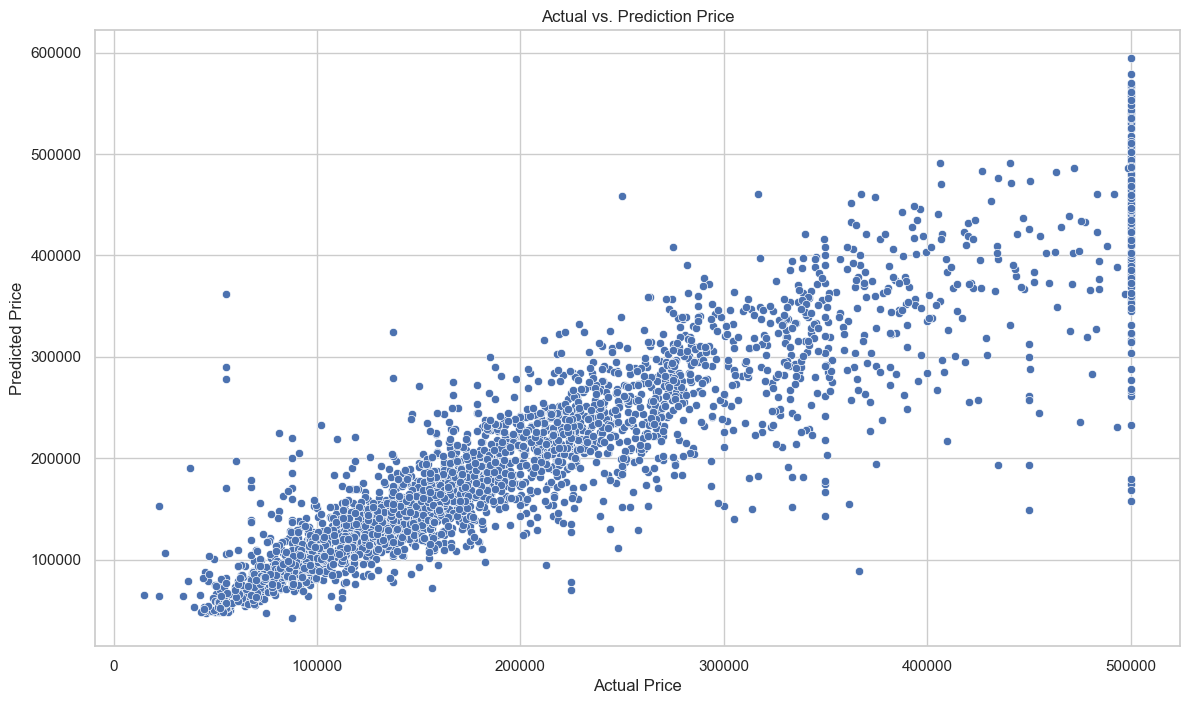

In [121]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

**Insight:**

1. Positive Correlation:
- There is a general positive trend, indicating that as the actual house price increases, the predicted house price also increases. This shows that the model has learned some relationship between features and the target variable.

2. Vertical Line at $500,000:
- There is a noticeable vertical line at the 500,000 mark on the actual price axis. This is likely due to the capping/clamping applied to the median_house_value column, as the dataset originally had a maximum value of 500,001, which was capped.

3. Prediction Outliers:
- There are several points where the predicted prices are significantly higher or lower than the actual prices. These are potential outliers or areas where the model is struggling to predict accurately.

4. Heteroscedasticity:
- The variance of prediction errors seems to increase with the actual price. The scatter points are more spread out for higher actual prices, indicating that the model is less accurate for expensive houses.

## **9. Feature Importance**

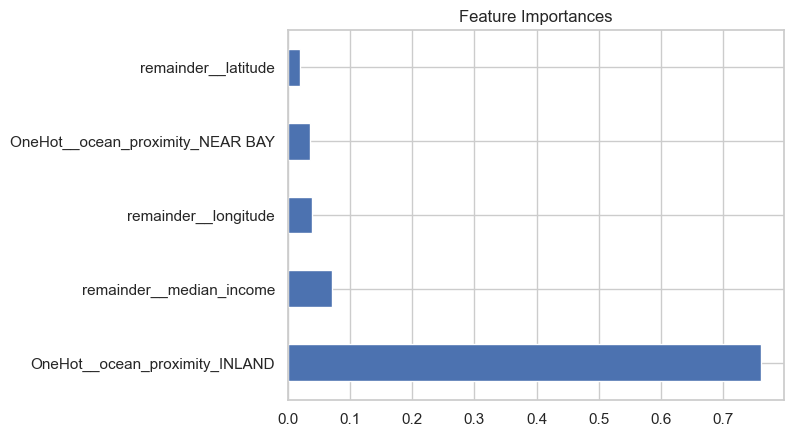

In [122]:
# Plot feature importances
feature_names = transformer.get_feature_names_out()
feature_importances = xgb_tuning['model'].regressor_.feature_importances_
feature_imp = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

In [123]:
df['ocean_proximity'].value_counts()


ocean_proximity
<1H OCEAN     6295
INLAND        4543
NEAR OCEAN    1855
NEAR BAY      1610
ISLAND           2
Name: count, dtype: int64

In [124]:
df.groupby('ocean_proximity')['median_house_value'].median()


ocean_proximity
<1H OCEAN     215200.0
INLAND        108800.0
ISLAND        351100.0
NEAR BAY      230800.0
NEAR OCEAN    228100.0
Name: median_house_value, dtype: float64

**Insight:**

The data shows that INLAND is the second most frequent class with 4543 entries and significantly cheaper than all other categories. So when this OneHot encoded feature ocean_proximity_INLAND = 1, the model can strongly adjut the price prediction downward. This makes it highly predictive, especially when combine with XGBoost abilty to isolate decision splits based on binary conditions. 

1. A house that is located INLAND is a major factor in predicting house prices in this model
2. Indicates income level of the area contributes significantly to the price prediction
3. Goegraphic coordinated plays a role, but not as dominant


## **10. Conclusion**

The XGBoost regression model, after hyperparameter tuning, demonstrated strong predictive performance for estimating California housing prices. On the test set, the model achieved an RMSE of 48808.47, an MAE of 31281.47, and a MAPE of 16.7%. These results indicate that the model’s predictions are, on average, within approximately 16.7% of the actual house prices, with an average absolute error of about $31,281. The reduction in error metrics after tuning confirms that hyperparameter optimization significantly improved model accuracy. The most important feature was 'ocean_proximity_INLAND', highlighting the strong influence of location on house prices, while median income and geographic coordinates also contributed notably to the predictions. Although the model performs well overall, prediction errors increase for higher-priced properties, likely due to the capped target variable and data distribution. Overall, the tuned XGBoost model provides reliable and actionable predictions for California housing prices and can be a valuable tool for real estate stakeholders.

## **11. Recommendation**

To further enhance the performance and robustness of the house price prediction model, several strategies can be considered:

1. Feature Engineering: Create new features such as rooms_per_household, bedrooms_per_room, or population_per_household to capture more granular relationships in the data.

2. Geospatial Features: Incorporate external geospatial data (e.g., distance to city centers, schools, or amenities) to improve the model's ability to capture location-based effects.

3. Address Target Capping: Investigate the impact of the $500,000 cap on median_house_value and consider modeling capped values separately or applying techniques for censored data.

4. Advanced Imputation: If missing values reappear, use advanced imputation methods (such as KNN or iterative imputer) instead of simple deletion to preserve more data.

5. Model Stacking/Ensembling: Combine multiple models (e.g., XGBoost, Random Forest, Linear Regression) using stacking or blending to potentially improve predictive performance.

6. Hyperparameter Optimization: Apply Bayesian optimization or more exhaustive search strategies for hyperparameter tuning to further enhance model performance.

7. Cross-Validation Strategy: Try stratified or spatial cross-validation to better reflect the data's distribution and reduce overfitting.

8. Interpretability: Use SHAP or LIME to interpret model predictions and gain deeper insights into feature contributions.

9. Outlier Handling: Explore robust regression techniques or outlier detection/removal to minimize their impact on model training.

10. Regular Updates: Retrain and update the model periodically with new data to maintain accuracy as market conditions change.

In [125]:
# from sklearn.pipeline import Pipeline
# from xgboost import XGBRegressor
# import joblib

# # Your transformer (assume it's already defined)
# # Your X_train and y_train must be already defined

# # Build and train pipeline
# pipeline = Pipeline([
#     ('preprocess', transformer),
#     ('model', XGBRegressor())
# ])
# pipeline.fit(X_train, y_train)

# # Save the trained pipeline
# joblib.dump(pipeline, 'xgboostmodel.pkl')
